<a href="https://colab.research.google.com/github/jinseriouspark/pytorch_with_jax/blob/main/pytorch_to_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transform pytorch to jax

- 활용자료 : https://github.com/hunkim/PyTorchZeroToAll

In [ ]:
# Transform pytorch to jax

In [15]:
import pandas as pd

data = pd.read_csv('/content/sample_data/california_housing_train.csv', nrows = 100)
feature_col = 'median_income'
target_col = 'median_house_value'

	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE= 4.666666666666667
	 1.0 2.0 2.0 0.0
	 2.0 4.0 4.0 0.0
	 3.0 6.0 6.0 0.0
MSE= 0.0
	 1.0 2.0 3.0 1.0
	 2.0 4.0 6.0 4.0
	 3.0 6.0 9.0 9.0
MSE= 4.666666666666667


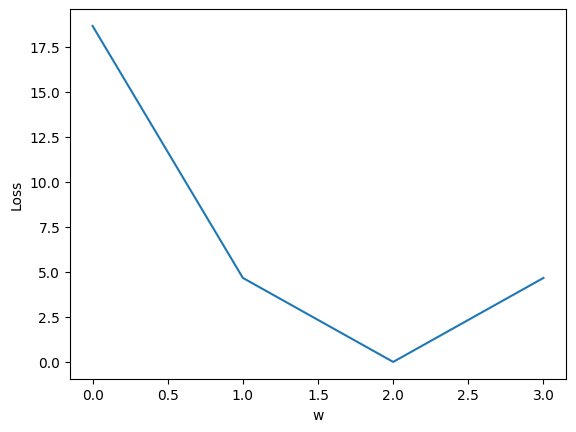

In [19]:
# 01_basic.py
import numpy as np
import matplotlib.pyplot as plt

#x_data = data[feature_col].values
#y_data = data[target_col].values

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) **2

# list of weights/mean square Error (MSE) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.0, 1.0):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l

    print('\t', x_val, y_val, y_pred_val, l)
  print('MSE=', l_sum/ len(x_data)) # 직접 평균 계산
  w_list.append(w)
  mse_list.append(l_sum / len(x_data))
# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

Epoch 1, Loss 3.836207151412964
Epoch 2, Loss 3.1535325050354004
Epoch 3, Loss 2.592343330383301
Epoch 4, Loss 2.131021499633789
Epoch 5, Loss 1.7517943382263184
Epoch 6, Loss 1.4400527477264404
Epoch 7, Loss 1.1837871074676514
Epoch 8, Loss 0.9731259346008301
Epoch 9, Loss 0.7999526262283325
Epoch 10, Loss 0.6575968861579895
Epoch 11, Loss 0.5405738353729248
Epoch 12, Loss 0.44437557458877563
Epoch 13, Loss 0.365296334028244
Epoch 14, Loss 0.30028998851776123
Epoch 15, Loss 0.24685168266296387
Epoch 16, Loss 0.20292294025421143
Epoch 17, Loss 0.16681180894374847
Epoch 18, Loss 0.13712671399116516
Epoch 19, Loss 0.11272414773702621
Epoch 20, Loss 0.09266418218612671
Epoch 21, Loss 0.0761740654706955
Epoch 22, Loss 0.06261858344078064
Epoch 23, Loss 0.05147525668144226
Epoch 24, Loss 0.04231487959623337
Epoch 25, Loss 0.03478473424911499
Epoch 26, Loss 0.02859465405344963
Epoch 27, Loss 0.02350599691271782
Epoch 28, Loss 0.019323039799928665
Epoch 29, Loss 0.015884418040513992
Epoch 30,

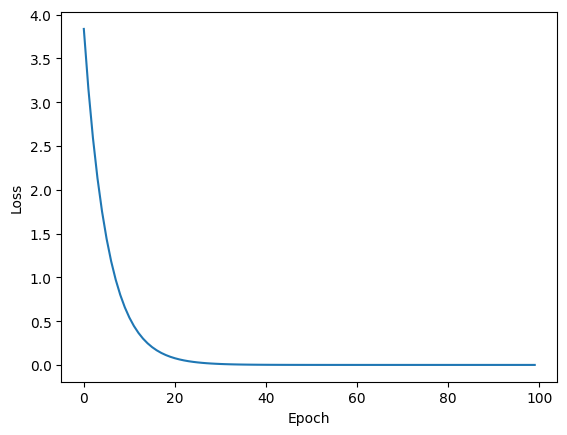

In [23]:
# 01_basic with jax
## jax.numpy as jnp , from jax import grad, jnp.mean() 등을 사용

import datetime
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

start_time = datetime.datetime.now()
# 데이터 정의
x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

# forward pass
def forward(x, w):
  return x * w
# loss
def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) **2)

# grad를 계산하는 함수 생성
grad_loss = grad(loss)

# 초기 w 값 설정
w = 1.0

# w업데이트하면서 손실감소
num_epochs = 100
losses = []
lr = 0.01

for epoch in range(num_epochs):
  grad_w = grad_loss(w, x_data, y_data)
  w -= lr * grad_w
  loss_val = loss(w, x_data, y_data)
  losses.append(loss_val)
  print(f'Epoch {epoch + 1}, Loss {loss_val}')

end_time = datetime.datetime.now()
print(end_time - start_time)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# 02_manual_gradient.py

# training data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y)

